# Atelier théorique #11 - **Algorithmes de régression**

### Objectifs de cette leçon
1. Découvrir différents algorithmes de régression.
2. Expérimenter les codes pour les différents algorithmes de régression.
3. Identifier manuellement les algorithmes qui performent le mieux pour la problématique et les données utilisées.
4. Rouler les algorithmes de façon automatique.
5. Visualiser les résultats sous forme de graphiques à pattes (*boxplot*).

### Étapes
Chaque bloc de code est construit selon la même logique.
1. Importer les librairies nécessaires pour l'algorithme testé.
2. Création d'un modèle à l'aide d'un algorithme.
3. Application d'une validation croisée de 10 itérations.
4. Évaluation du modèle avec le métrique de précision (*accuracy*).
5. Imprimer la performance du modèle.

### Importer les librairies nécessaires

In [ ]:
# Importer les librairies de base
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le style des graphiques
sns.set_style("darkgrid")

# Importer les librairies d'apprentissage automatique
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

### Importer le jeu de données Energy_Efficiency pour la classification

In [ ]:
# Importer la librairie pandas
import pandas as pd

# Télécharger le jeu de données
data = pd.read_csv('energy_efficiency.csv')

# Remplacer le nom des colonnes
colnames = ['compact', 'surface', 'wall', 'roof', 'height', 'orient', 'glazing', 'glazing_dist', 'heating', 'cooling']
data.columns = colnames

# Observer le jeu de données avec les nouvelles colonnes
data.head()

,compact,surface,wall,roof,height,orient,glazing,glazing_dist,heating,cooling
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Séparer les données en sous-ensemble X et y

In [ ]:
# Préparation des données
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]

In [ ]:
# Imprimer l'aperçu des colonnes incluses dans X
X.head()

,compact,surface,wall,roof,height,orient,glazing,glazing_dist
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [ ]:
# Imprimer les colonnes incluses dans y
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: heating, dtype: float64

## 1.Création des modèles de régression

### 1.1 Régression linéaire *(Linear Regression)*

In [ ]:
# Importer les libraires spécifiques
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()
lr_results = cross_val_score(lr_model, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Modèle : {lr_model.__class__.__name__}")
print(f"MSE : {abs(round(lr_results.mean(), 3))} +/- {round(lr_results.std(), 3)}")
print(f'RMSE : {round(sqrt(abs(lr_results.mean())), 3)}')

Modèle : LinearRegression
MSE : 9.933 +/- 5.685
RMSE : 3.152


### 1.2 Régression de Crête *(Ridge Regression)*

In [ ]:
# Importer les libraires spécifiques
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [ ]:
rr_model = Ridge()
rr_results = cross_val_score(rr_model, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Modèle : {rr_model.__class__.__name__}")
print(f"MSE : {abs(round(rr_results.mean(), 3))} +/- {round(rr_results.std(), 3)}")
print(f'RMSE : {round(sqrt(abs(rr_results.mean())), 3)}')

Modèle : Ridge
MSE : 10.4 +/- 6.501
RMSE : 3.225


### 1.3 Régression Linéaire Lasso *(Lasso Linear Regression)*

In [ ]:
# Importer les libraires spécifiques
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [ ]:
las_model = Lasso()
las_results = cross_val_score(las_model, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Modèle : {las_model.__class__.__name__}")
print(f"MSE : {abs(round(las_results.mean(), 3))} +/- {round(las_results.std(), 3)}")
print(f'RMSE : {round(sqrt(abs(las_results.mean())), 3)}')

Modèle : Lasso
MSE : 24.493 +/- 16.793
RMSE : 4.949


### 1.4 Régression Elastic Net *(Elastic Net Regression)*

In [ ]:
# Importer les libraires spécifiques
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

In [ ]:
enr_model = ElasticNet()
enr_results = cross_val_score(enr_model, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Modèle : {enr_model.__class__.__name__}")
print(f"MSE : {abs(round(enr_results.mean(), 3))} +/- {round(enr_results.std(), 3)}")
print(f'RMSE : {round(sqrt(abs(enr_results.mean())), 3)}')

Modèle : ElasticNet
MSE : 23.454 +/- 16.767
RMSE : 4.843


### 1.5 K plus proches voisins *(k-Nearest Neighbors - KNN)*

In [ ]:
# Importer les libraires spécifiques
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_model = KNeighborsRegressor()
knn_results = cross_val_score(knn_model, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Modèle : {knn_model.__class__.__name__}")
print(f"MSE : {abs(round(knn_results.mean(), 3))} +/- {round(knn_results.std(), 3)}")
print(f'RMSE : {round(sqrt(abs(knn_results.mean())), 3)}')

Modèle : KNeighborsRegressor
MSE : 10.593 +/- 17.453
RMSE : 3.255


### 1.6 Arbres de décision *(Decision Trees)*

In [ ]:
# Importer les libraires spécifiques
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr_model = DecisionTreeRegressor()
dtr_results = cross_val_score(dtr_model, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Modèle : {dtr_model.__class__.__name__}")
print(f"MSE : {abs(round(dtr_results.mean(), 3))} +/- {round(dtr_results.std(), 3)}")
print(f'RMSE : {round(sqrt(abs(dtr_results.mean())), 3)}')

Modèle : DecisionTreeRegressor
MSE : 2.833 +/- 7.376
RMSE : 1.683


### 1.7 Machines à vecteurs de support *(Support Vector Machine - SVM)*

In [ ]:
# Importer les libraires spécifiques
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

In [ ]:
svr_model = SVR()
svr_results = cross_val_score(svr_model, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Modèle : {svr_model.__class__.__name__}")
print(f"MSE : {abs(round(svr_results.mean(), 3))} +/- {round(svr_results.std(), 3)}")
print(f'RMSE : {round(sqrt(abs(svr_results.mean())), 3)}')

Modèle : SVR
MSE : 30.427 +/- 13.645
RMSE : 5.516


## 2. Comparer les algorithmes d'apprentissage automatique

### 2.1 Regrouper les modèles dans un tableau

C'est la méthode statique de regrouper les résultats obtenus pour les modèles. 

In [ ]:
# Créer une liste avec le nom des algorithmes
algo = ['Linear Regression', 
        'Ridge Regression', 
        'Lasso Linear Regression',
        'Elastic Net Regression', 
        'k-Nearest Neighbors', 
        'Decision Trees Regressor', 
        'Support Vector Machine']

In [ ]:
# Créer une liste avec le nom des modèles
modname = ['lr_model', 
           'rr_model',
           'las_model', 
           'enr_model', 
           'knn_model', 
           'dtr_model', 
           'svr_model']

In [ ]:
# Créer une liste avec les précisions
acc = []
acc.append(abs(lr_results.mean()))
acc.append(abs(rr_results.mean()))
acc.append(abs(las_results.mean()))
acc.append(abs(enr_results.mean()))
acc.append(abs(knn_results.mean()))
acc.append(abs(dtr_results.mean()))
acc.append(abs(svr_results.mean()))
acc

[9.933426066238063,
 10.399857749099708,
 24.492631419892003,
 23.45396426238135,
 10.592892544839371,
 2.833304208817498,
 30.426694806412865]

In [ ]:
# Créer une liste avec les écart-types
std = []
std.append(abs(lr_results.std()))
std.append(abs(rr_results.std()))
std.append(abs(las_results.std()))
std.append(abs(enr_results.std()))
std.append(abs(knn_results.std()))
std.append(abs(dtr_results.std()))
std.append(abs(svr_results.std()))
std

[5.684664269570282,
 6.5011114864579715,
 16.793326755001537,
 16.766718341285237,
 17.453378946240203,
 7.375634403678528,
 13.645133214930029]

In [ ]:
# Créer un dictionnaire avec les listes qu'on vient de créer
results = {'algorithm':algo, 'model_name':modname, 'mse':acc, 'std':std}
print(results)

{'algorithm': ['Linear Regression', 'Ridge Regression', 'Lasso Linear Regression', 'Elastic Net Regression', 'k-Nearest Neighbors', 'Decision Trees Regressor', 'Support Vector Machine'], 'model_name': ['lr_model', 'rr_model', 'las_model', 'enr_model', 'knn_model', 'dtr_model', 'svr_model'], 'mse': [9.933426066238063, 10.399857749099708, 24.492631419892003, 23.45396426238135, 10.592892544839371, 2.833304208817498, 30.426694806412865], 'std': [5.684664269570282, 6.5011114864579715, 16.793326755001537, 16.766718341285237, 17.453378946240203, 7.375634403678528, 13.645133214930029]}


In [ ]:
# Importer le dictionnaire dans un tableau de données pandas
results_table = pd.DataFrame(results)
results_table = results_table.round({'mse': 3, 'std': 3})
results_table = results_table.sort_values(by='mse', ascending=True)
results_table

,algorithm,model_name,mse,std
5,Decision Trees Regressor,dtr_model,2.833,7.376
0,Linear Regression,lr_model,9.933,5.685
1,Ridge Regression,rr_model,10.400,6.501
4,k-Nearest Neighbors,knn_model,10.593,17.453
3,Elastic Net Regression,enr_model,23.454,16.767
2,Lasso Linear Regression,las_model,24.493,16.793
6,Support Vector Machine,svr_model,30.427,13.645


### 2.2 Rouler tous les modèles en même temps avec une boucle

Une façon plus efficace d'obtenir les résultats pour tous les algorithmes en même temps est d'utiliser une boucle. 

In [ ]:
# Préparer les modèles et les enregistrer dans une liste
models = []
models.append(('LR', LinearRegression()))
models.append(('RR', Ridge()))
models.append(('LAS', Lasso()))
models.append(('ENR', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [ ]:
# Initialiser 2 listes pour y enregistrer les résultats de la boucle
results = []
names = []

# Créer la boucle pour rouler chaque modèle
for name, model in models:
  cv_results = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  print(f"MSE {model.__class__.__name__} : {abs(round(cv_results.mean(), 3))} +/- {round(cv_results.std(), 3)} (RMSE = {round(sqrt(abs(cv_results.mean())), 3)})")

MSE LinearRegression : 9.933 +/- 5.685 (RMSE = 3.152)
MSE Ridge : 10.4 +/- 6.501 (RMSE = 3.225)
MSE Lasso : 24.493 +/- 16.793 (RMSE = 4.949)
MSE ElasticNet : 23.454 +/- 16.767 (RMSE = 4.843)
MSE KNeighborsRegressor : 10.593 +/- 17.453 (RMSE = 3.255)
MSE DecisionTreeRegressor : 2.833 +/- 7.376 (RMSE = 1.683)
MSE SVR : 30.427 +/- 13.645 (RMSE = 5.516)


In [ ]:
print(results)

[array([-26.55755687,  -7.64104401,  -8.70920778,  -9.48170653,
        -5.7808165 ,  -9.40022805,  -6.41846821,  -9.25741389,
        -9.12872353,  -6.95909529]), array([-29.46001027,  -6.69252056,  -8.86029352,  -9.30390486,
        -6.21179545,  -9.75269132,  -7.2227002 , -10.33061102,
        -9.35420053,  -6.80984976]), array([-70.01524492, -17.62482822, -17.5341848 , -23.96393436,
        -9.34968107, -15.45484348, -12.19051558, -34.83692152,
       -27.8941933 , -16.06196695]), array([-68.70494725, -15.75012624, -16.97078302, -23.76238143,
        -8.86256324, -14.06104073, -11.92976971, -34.80097047,
       -25.90679664, -13.79026389]), array([-62.34143231,  -5.75504192,  -5.67951439,  -4.87711927,
        -0.47307761,  -0.81454114,  -2.46840026,  -8.71000701,
        -7.11269674,  -7.69709479]), array([-24.95713506,  -0.10548052,  -0.47455844,  -0.43642597,
        -0.34789091,  -0.34315455,  -0.23602468,  -0.41459481,
        -0.56443421,  -0.45370658]), array([-55.88509728, 

In [ ]:
print(names)

['LR', 'RR', 'LAS', 'ENR', 'KNN', 'DTR', 'SVR']


## 3. Visualiser les performances des modèles

### 3.1 En utilisant matplotlib

In [ ]:
# Importer les librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le style des graphiques
sns.set_style("darkgrid")

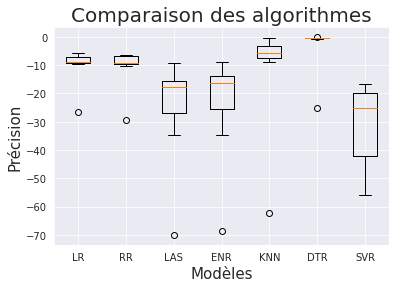

In [ ]:
# Visualiser avec matlplotlib
fig = plt.figure()
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.title('Comparaison des algorithmes', fontsize=20)
plt.xlabel('Modèles', fontsize=15)
plt.ylabel('Précision', fontsize=15)
plt.show()

### 3.2 En utilisant seaborn

Pour utiliser la librairie seaborn, il faut tout d'abord créer un tableau qui contient les résultats dans un format long. 

In [ ]:
# Créer un dictionnaire contenant les modèles et les résultats de la validation croisée
dict(zip(names, results))

{'DTR': array([-24.95713506,  -0.10548052,  -0.47455844,  -0.43642597,
         -0.34789091,  -0.34315455,  -0.23602468,  -0.41459481,
         -0.56443421,  -0.45370658]),
 'ENR': array([-68.70494725, -15.75012624, -16.97078302, -23.76238143,
         -8.86256324, -14.06104073, -11.92976971, -34.80097047,
        -25.90679664, -13.79026389]),
 'KNN': array([-62.34143231,  -5.75504192,  -5.67951439,  -4.87711927,
         -0.47307761,  -0.81454114,  -2.46840026,  -8.71000701,
         -7.11269674,  -7.69709479]),
 'LAS': array([-70.01524492, -17.62482822, -17.5341848 , -23.96393436,
         -9.34968107, -15.45484348, -12.19051558, -34.83692152,
        -27.8941933 , -16.06196695]),
 'LR': array([-26.55755687,  -7.64104401,  -8.70920778,  -9.48170653,
         -5.7808165 ,  -9.40022805,  -6.41846821,  -9.25741389,
         -9.12872353,  -6.95909529]),
 'RR': array([-29.46001027,  -6.69252056,  -8.86029352,  -9.30390486,
         -6.21179545,  -9.75269132,  -7.2227002 , -10.33061102,
  

In [ ]:
# Créer un tableau de données avec le dictionnaire des résultats
scores_table = pd.DataFrame(data=dict(zip(names, results)))
scores_table

,LR,RR,LAS,ENR,KNN,DTR,SVR
0,-26.557557,-29.460010,-70.015245,-68.704947,-62.341432,-24.957135,-55.885097
1,-7.641044,-6.692521,-17.624828,-15.750126,-5.755042,-0.105481,-16.767086
2,-8.709208,-8.860294,-17.534185,-16.970783,-5.679514,-0.474558,-20.327121
3,-9.481707,-9.303905,-23.963934,-23.762381,-4.877119,-0.436426,-22.629751
4,-5.780817,-6.211795,-9.349681,-8.862563,-0.473078,-0.347891,-16.786610
5,-9.400228,-9.752691,-15.454843,-14.061041,-0.814541,-0.343155,-27.355168
6,-6.418468,-7.222700,-12.190516,-11.929770,-2.468400,-0.236025,-19.470707
7,-9.257414,-10.330611,-34.836922,-34.800970,-8.710007,-0.414595,-48.296205
8,-9.128724,-9.354201,-27.894193,-25.906797,-7.112697,-0.564434,-45.558264
9,-6.959095,-6.809850,-16.061967,-13.790264,-7.697095,-0.453707,-31.190940


In [ ]:
# Transformer les données du format large au format long
scores_table_melt = pd.melt(scores_table, var_name='model', value_name='score')
scores_table_melt.head(11)

,model,score
0,LR,-26.557557
1,LR,-7.641044
2,LR,-8.709208
3,LR,-9.481707
4,LR,-5.780817
5,LR,-9.400228
6,LR,-6.418468
7,LR,-9.257414
8,LR,-9.128724
9,LR,-6.959095


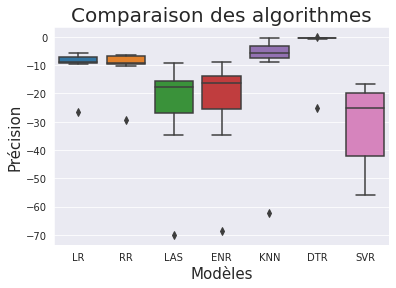

In [ ]:
# Visualiser avec seaborn
sns.boxplot(data=scores_table_melt, x='model', y='score')
plt.title('Comparaison des algorithmes', fontsize=20)
plt.xlabel('Modèles', fontsize=15)
plt.ylabel('Précision', fontsize=15)
plt.show()

## **LEÇON #11 - EXERCICE CONTINU**

## Algorithmes de régression

> *Utiliser votre notebook individuel `notebook_pratique_régression.ipynb` pour les exercices concernant la régression avec le jeu de données `concrete.csv`.*

## Tâches à accomplir :

### Étapes préliminaires
1. Choisissez un **métrique de régression** pour évaluer la performance de vos modèles.
  * Lien vers les métriques disponibles : https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values 
2. Sélectionner 4 algorithmes qu'on a vu dans le cours.
3. Ajouter 1 algorithme supplémentaire qu'on n'a pas vu dans le cours.
  * Indice : https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

### Étapes de modélisation
1. Rouler chacun des algorithmes de la liste fournie individuellement.
  * **Vous allez devoir réutiliser ce même métrique jusqu'à la fin de l'exercice continue**.
2. Regrouper les résultats des modèles sous forme de tableau et classer les précisions en ordre décroissant.
3. Créer une boucle afin de faire rouler tous les algorithmes de la liste en même temps.
4. Visualiser les performances des modèles à partir d'un graphique à boite de moustache.
  * 4.1 Quel est le meilleur modèle?
  * 4.2 Quel est le pire modèle?
  * 4.3 Y a-t-il des modèles qui semblent avoir des performances équivalentes? Si oui, lesquels?
